**Hill and Valley Prediction with Logistic Regression**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

**DATA SOURCE**

In [ ]:
project = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Hill%20Valley%20Dataset.csv')

**GET THE FIRST 10 ROWS OF DATAFRAME**

In [ ]:
project.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0
5,3.37,3.35,3.51,3.35,3.37,3.36,3.29,3.34,3.38,3.34,...,3.31,3.31,3.47,3.30,3.48,3.43,3.38,3.31,3.48,0
6,23.02,23.14,23.69,21.89,22.09,24.96,25.13,21.36,23.68,21.50,...,23.51,24.86,22.69,22.60,24.68,21.62,24.64,20.94,23.01,0
7,1488.34,1531.87,1371.16,1486.59,1386.43,1570.24,1370.25,1554.82,1510.77,1387.45,...,1472.70,1375.69,1427.02,1526.99,1507.12,1420.94,1541.97,1462.02,1452.74,0
8,25.97,25.58,25.06,25.34,25.96,25.54,26.34,25.02,26.30,24.80,...,24.83,24.97,25.32,25.23,24.88,25.20,25.89,25.80,25.18,1
9,7354.68,7451.58,6605.84,7479.67,6974.47,7562.17,7836.13,7694.08,6538.31,6981.51,...,7745.83,6825.93,6609.95,8057.45,6999.11,7639.73,6974.83,7911.31,7289.52,1


**GET THE INFORMATION OF DATAFRAME**

In [ ]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


**GET THE SUMMARY STATISTICS**

In [ ]:
project.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


**GET COLUMN NAMES**

In [ ]:
project.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

**ALL COLUMN NAME NOT PRINTED**

In [ ]:
print(project.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'Class']


**GET THE SHAPE OF DATAFARME**

In [ ]:
 project.shape

(1212, 101)

**GET UNIQUE VALUES (CLASS OR LABLE) IN Y VARIABLE**

In [ ]:
project.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,...,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,...,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


**DEFINE y (DEPENDENT OR LABLE OR TRAGET VARIBLE) AND x (INDEPENDENT OR FEATURES OR ATTRIBUTES VARIBLES)**

In [ ]:
y = project['Class']

In [83]:
y.shape

(1212,)

In [ ]:
x = project[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',

       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100']]

In [ ]:
x.shape

(1212, 19)

In [ ]:
x


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82


**GET PLOT OF FIRST TWO ROWS**

In [81]:
y

,Class
0,0
1,1
2,1
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Valley')

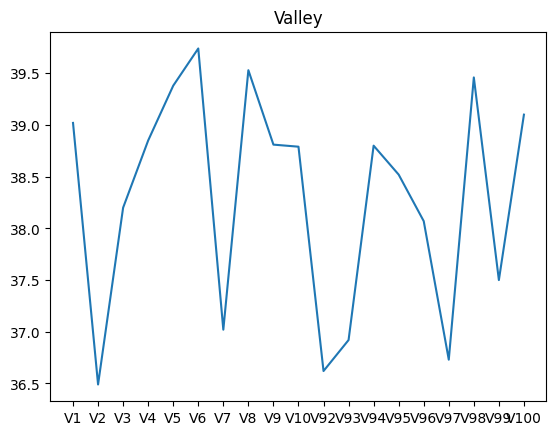

In [ ]:
plt.plot(x.iloc[0,:])
plt.title('Valley')

Text(0.5, 1.0, 'Hill')

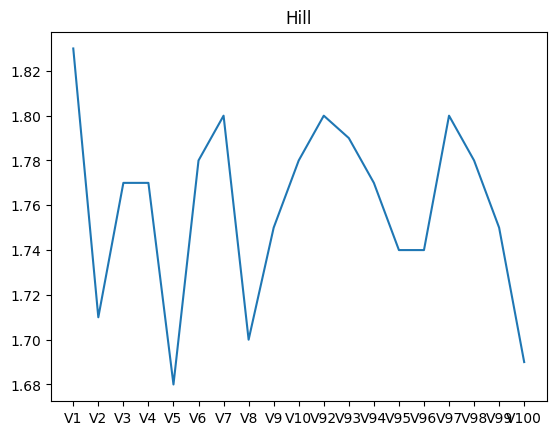

In [ ]:
plt.plot(x.iloc[1,:])
plt.title('Hill')

**GET X VARIABLE STANDARDIZED**

Standardization is commonly required for many machine learning models in scikit-learn. These models often perform poorly if the individual features don't resemble a standard normal distribution (mean of zero and variance of one). As an alternative, min-max scaling can be used.

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
model = StandardScaler()

In [ ]:
x = model.fit_transform(x)

In [ ]:
x

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

In [ ]:
x.shape

(1212, 19)

**GET TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=2529)
x_train

array([[-0.4545945 , -0.45559617, -0.4530602 , ..., -0.4582509 ,
        -0.45365854, -0.45758099],
       [ 0.56962844,  0.59568756,  0.50086328, ...,  0.57034067,
         0.59616514,  0.66540473],
       [-0.37607788, -0.38450053, -0.38095424, ..., -0.38906851,
        -0.38567728, -0.38330238],
       ...,
       [ 0.08597052,  0.09635646,  0.09202116, ...,  0.09106595,
         0.09459202,  0.11071079],
       [-0.18088525, -0.18706097, -0.18087654, ..., -0.19184228,
        -0.18328797, -0.20006938],
       [ 0.60636303,  0.61529013,  0.61262196, ...,  0.60524519,
         0.57632278,  0.61447878]])

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((848, 19), (364, 19), (848,), (364,))

**GET TRAIN MODEL**

In [85]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [87]:
model1 = LogisticRegression(max_iter=1000)


In [ ]:
model1.fit(x_train,y_train)

LogisticRegression()

**GET MODEL PREDICTION**

In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
y_pred.shape

(364,)

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,

**GET PROBABILITY OF EACH PREDICITED CLASS**

In [ ]:
model1.predict_proba(x_test)

array([[0.49170571, 0.50829429],
       [0.5037615 , 0.4962385 ],
       [0.50602808, 0.49397192],
       [0.50367036, 0.49632964],
       [0.50374494, 0.49625506],
       [0.50379214, 0.49620786],
       [0.50337672, 0.49662328],
       [0.46659871, 0.53340129],
       [0.50350427, 0.49649573],
       [0.50361856, 0.49638144],
       [0.50398475, 0.49601525],
       [0.50372398, 0.49627602],
       [0.5936217 , 0.4063783 ],
       [0.50357235, 0.49642765],
       [0.50393638, 0.49606362],
       [0.58784633, 0.41215367],
       [0.5000617 , 0.4999383 ],
       [0.5036856 , 0.4963144 ],
       [0.50378314, 0.49621686],
       [0.5037595 , 0.4962405 ],
       [0.44934192, 0.55065808],
       [0.4500082 , 0.5499918 ],
       [0.5037645 , 0.4962355 ],
       [0.52203565, 0.47796435],
       [0.5036165 , 0.4963835 ],
       [0.50321098, 0.49678902],
       [0.50382611, 0.49617389],
       [0.49853219, 0.50146781],
       [0.50376488, 0.49623512],
       [0.50356847, 0.49643153],
       [0.

**GET MODEL EVALUATION**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[154,  28],
       [134,  48]])

**GET FUTURE PREDICITION**

Let select a random sample from existing dataset as new value:


1.  Extract a random row using sample
     function

2. Seperate x and y

3.   Standradize x

4.   Predict

In [ ]:
x_new = project.sample()

In [ ]:
x_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
856,2.47,2.19,2.44,2.28,2.55,2.36,2.46,2.04,2.12,1.97,...,2.52,2.55,2.61,2.73,2.57,2.29,2.53,2.71,2.61,0


In [79]:
from sklearn.metrics import accuracy_score


In [89]:
accuracy_score(y_test,y_pred)

0.554945054945055

**Explaination**

Logistic regression estimates the probability of an event occurring based on given input features. It doesn't directly output a class label (like 0 or 1), but instead provides a probability value between 0 and 1.

Here's how it works:

Calculate linear combination: The model calculates a linear combination of input features and their corresponding weights:

z = w0 + w1*x1 + w2*x2 + ... + wn*xn where:
z is the linear combination
w0 is the intercept
w1, w2, ... , wn are weights for features x1, x2, ... , xn
Apply sigmoid function: The result z is passed through a sigmoid function to obtain a probability:

p = 1 / (1 + exp(-z)) where:
p is the probability of the positive class (e.g., 1)
Make prediction: If the probability p is greater than a predefined threshold (usually 0.5), the predicted class is 1; otherwise, it's 0.

In essence, logistic regression learns the optimal weights through training data to accurately estimate the probability of an event occurring. The final prediction is based on whether this probability exceeds a specified threshold.